# **COVID - 19: casos novos e mortes por dia (Países)**
### José Eduardo S. Pimentel

Dados obtidos de repositório do GitHub atualizado diariamente com as informações do Johns Hopkins Hospital.

Fonte: 'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

covidTotal = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
paises = ['Brazil', 'Chile', 'Argentina', 'Korea, South', 'Italy', 'Spain', 'Canada', 'Germany', 'United Kingdom', 'US', 'France', 'China']
covidTotal = covidTotal[covidTotal['Country'].isin(paises)]
covidTotal.rename(columns={'Date': 'Data', 'Country': 'Pais', 'Confirmed': 'Confirmados', 'Recovered': 'Recuperados', 'Deaths': 'Mortes'}, inplace=True)

# Pivoteamento dos dados para a obtenção de casos/mortes acumulados (por data)

casos_confirmados = covidTotal.pivot(index='Data', columns='Pais', values='Confirmados')
mortes = covidTotal.pivot (index = 'Data', columns = 'Pais', values = 'Mortes')
casos_confirmados.rename(columns={'Brazil': 'Brasil', 'Canada': 'Canadá', 'France': 'França', 'Germany': 'Alemanha',
                                  'Italy': 'Itália', 'Korea, South': 'C. do Sul', 'Spain': 'Espanha', 'US': 'EUA', 
                                  'United Kingdom': 'R. Unido'}, inplace=True)
mortes.rename(columns={'Brazil': 'Brasil', 'Canada': 'Canadá', 'France': 'França', 'Germany': 'Alemanha',
                                  'Italy': 'Itália', 'Korea, South': 'C. do Sul', 'Spain': 'Espanha', 'US': 'EUA', 
                                  'United Kingdom': 'R. Unido'}, inplace=True)

# Cálculo de casos novos e mortes por dia

covid_novos_por_dia = casos_confirmados.copy()
for i in range (len(covid_novos_por_dia) - 1, 0, -1):
  covid_novos_por_dia.iloc[i] = covid_novos_por_dia.iloc[i] - covid_novos_por_dia.iloc[i-1]

mortes_por_dia = mortes.copy()
for i in range (len(mortes_por_dia) - 1, 0, -1):
  mortes_por_dia.iloc[i] = mortes_por_dia.iloc[i] - mortes_por_dia.iloc[i-1]

In [2]:
# Número acumulado dos casos de COVID-19 (últimos 10 dias)
casos_confirmados.tail (10)

Pais,Argentina,Brasil,Canadá,Chile,China,França,Alemanha,Itália,C. do Sul,Espanha,EUA,R. Unido
Data,,,,,,,,,,,,
2020-04-10,1975,19638,22059,6501,82941,91738,122171,147577,10450,158273,496535,74605
2020-04-11,1975,20727,23316,6927,83014,94863,124908,152271,10480,163027,526396,79874
2020-04-12,2142,22192,24298,7213,83134,121712,127854,156363,10512,166831,555313,85206
2020-04-13,2208,23430,25679,7525,83213,125394,130072,159516,10537,170099,580619,89570
2020-04-14,2277,25262,27034,7917,83306,131361,131359,162488,10564,172541,607670,94845
2020-04-15,2443,28320,28208,8273,83356,134582,134753,165155,10591,177644,636350,99483
2020-04-16,2571,30425,30808,8807,83403,147091,137698,168941,10613,184948,667592,104145
2020-04-17,2669,33682,32813,9252,83760,149130,141397,172434,10635,190839,699706,109769
2020-04-18,2758,36658,34355,9730,83787,149149,143342,175925,10653,191726,732197,115314


In [3]:
# Número acumulado de mortes por COVID-19 nos últimos 10 dias
mortes.tail(10)

Pais,Argentina,Brasil,Canadá,Chile,China,França,Alemanha,Itália,C. do Sul,Espanha,EUA,R. Unido
Data,,,,,,,,,,,,
2020-04-10,82,1057,557,65,3340,13215,2767,18849,208,16081,18586,8974
2020-04-11,83,1124,654,73,3343,13851,2736,19468,211,16606,20462,9892
2020-04-12,90,1223,714,80,3343,14412,3022,19899,214,17209,22019,10629
2020-04-13,97,1328,779,82,3345,14986,3194,20465,217,17756,23528,11347
2020-04-14,102,1532,899,92,3345,15748,3294,21067,222,18056,25831,12129
2020-04-15,111,1736,1006,94,3346,17188,3804,21645,225,18708,28325,12894
2020-04-16,115,1924,1257,105,3346,17941,4052,22170,229,19315,32916,13759
2020-04-17,123,2141,1354,116,4636,18703,4352,22745,230,20002,36773,14607
2020-04-18,129,2354,1399,126,4636,19345,4459,23227,232,20043,38664,15498


In [4]:
# Número de casos novos de COVID-19, por dia (últimos 10 dias)
covid_novos_por_dia.tail(10)

Pais,Argentina,Brasil,Canadá,Chile,China,França,Alemanha,Itália,C. do Sul,Espanha,EUA,R. Unido
Data,,,,,,,,,,,,
2020-04-10,180,1546,1405,529,58,4372,3990,3951,27,5051,33755,8733
2020-04-11,0,1089,1257,426,73,3125,2737,4694,30,4754,29861,5269
2020-04-12,167,1465,982,286,120,26849,2946,4092,32,3804,28917,5332
2020-04-13,66,1238,1381,312,79,3682,2218,3153,25,3268,25306,4364
2020-04-14,69,1832,1355,392,93,5967,1287,2972,27,2442,27051,5275
2020-04-15,166,3058,1174,356,50,3221,3394,2667,27,5103,28680,4638
2020-04-16,128,2105,2600,534,47,12509,2945,3786,22,7304,31242,4662
2020-04-17,98,3257,2005,445,357,2039,3699,3493,22,5891,32114,5624
2020-04-18,89,2976,1542,478,27,19,1945,3491,18,887,32491,5545


In [5]:
# Número de novas mortes por COVID-19, por dia (últimos 10 dias)
mortes_por_dia.tail (10)

Pais,Argentina,Brasil,Canadá,Chile,China,França,Alemanha,Itália,C. do Sul,Espanha,EUA,R. Unido
Data,,,,,,,,,,,,
2020-04-10,10,107,54,8,1,987,160,570,4,634,2042,981
2020-04-11,1,67,97,8,3,636,-31,619,3,525,1876,918
2020-04-12,7,99,60,7,0,561,286,431,3,603,1557,737
2020-04-13,7,105,65,2,2,574,172,566,3,547,1509,718
2020-04-14,5,204,120,10,0,762,100,602,5,300,2303,782
2020-04-15,9,204,107,2,1,1440,510,578,3,652,2494,765
2020-04-16,4,188,251,11,0,753,248,525,4,607,4591,865
2020-04-17,8,217,97,11,1290,762,300,575,1,687,3857,848
2020-04-18,6,213,45,10,0,642,107,482,2,41,1891,891


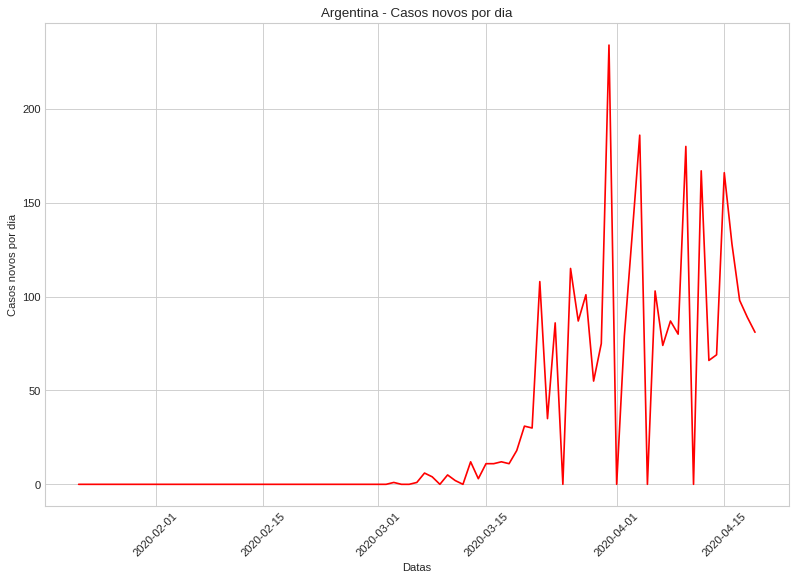

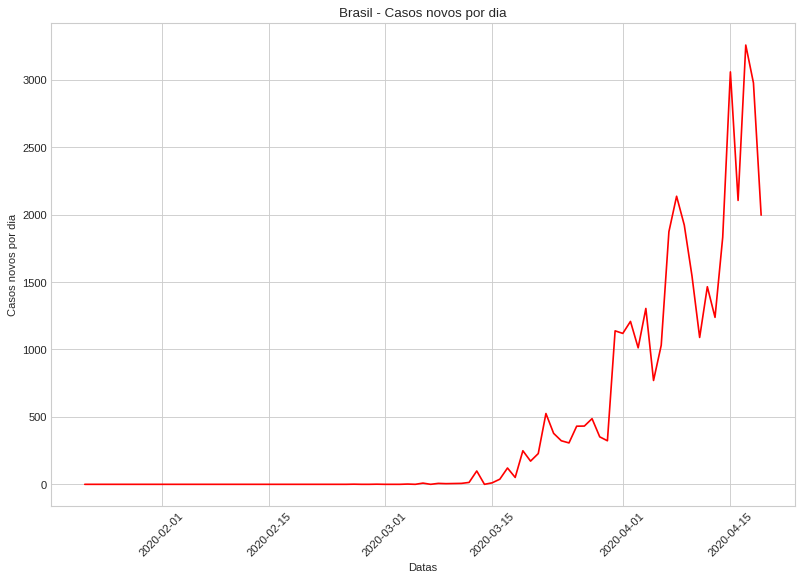

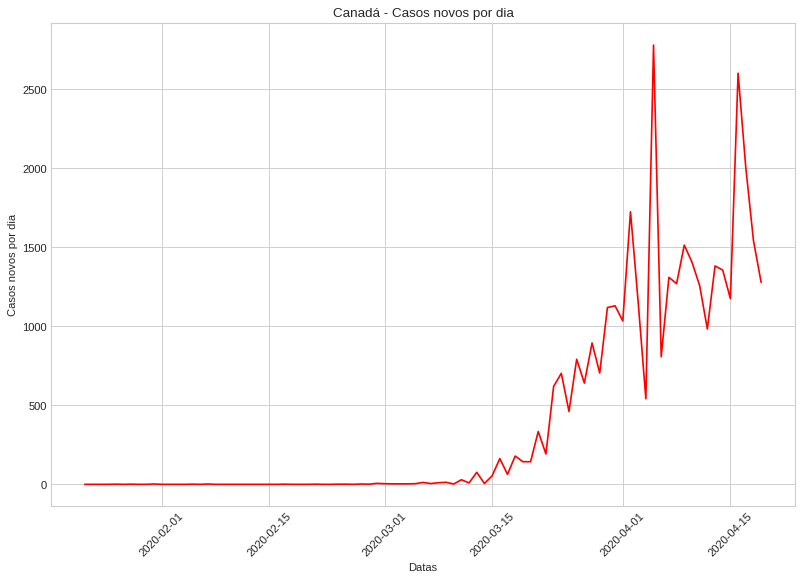

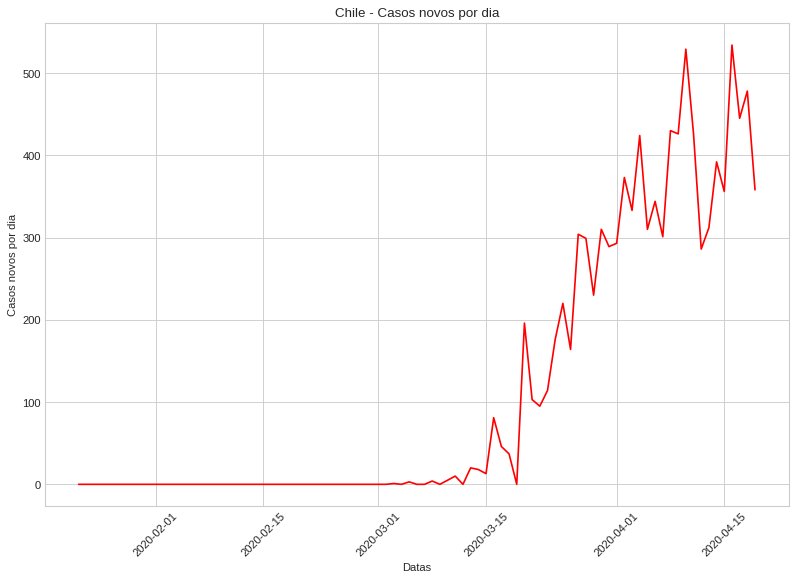

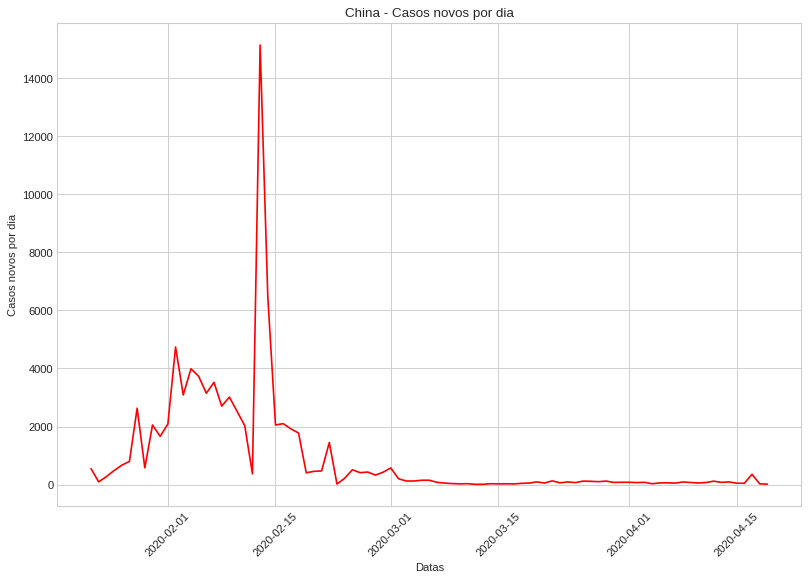

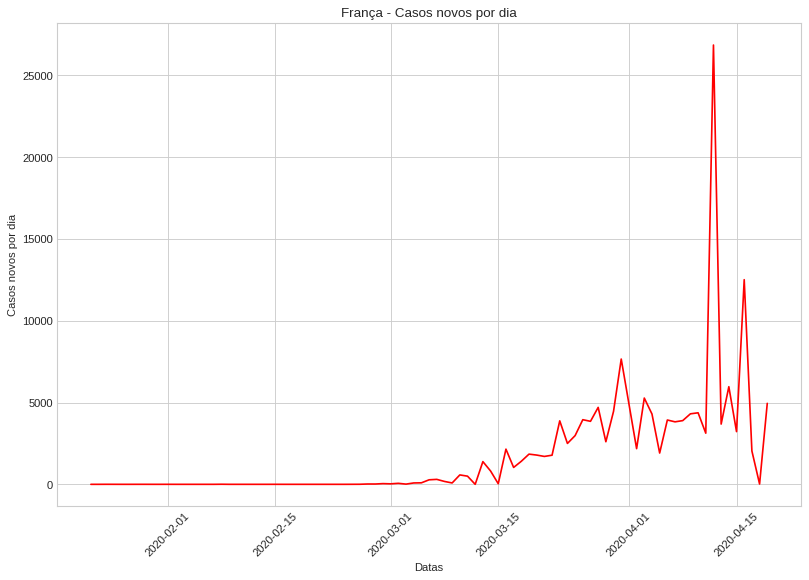

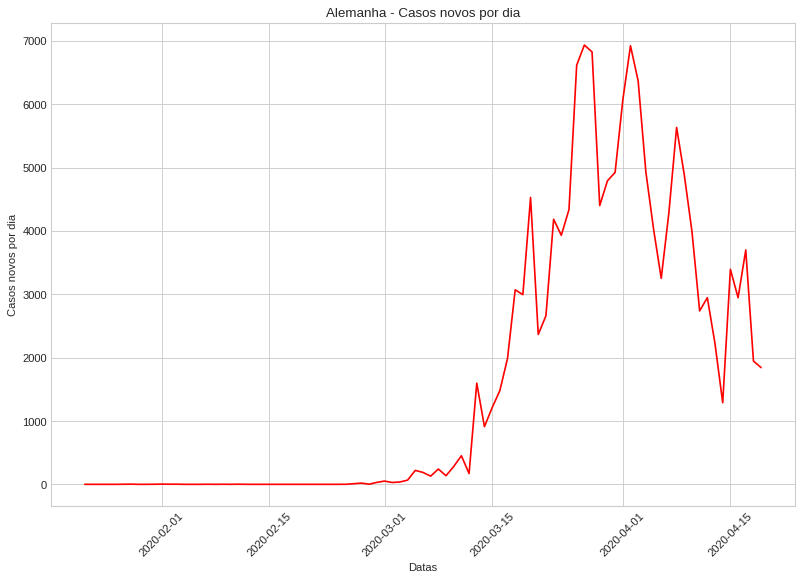

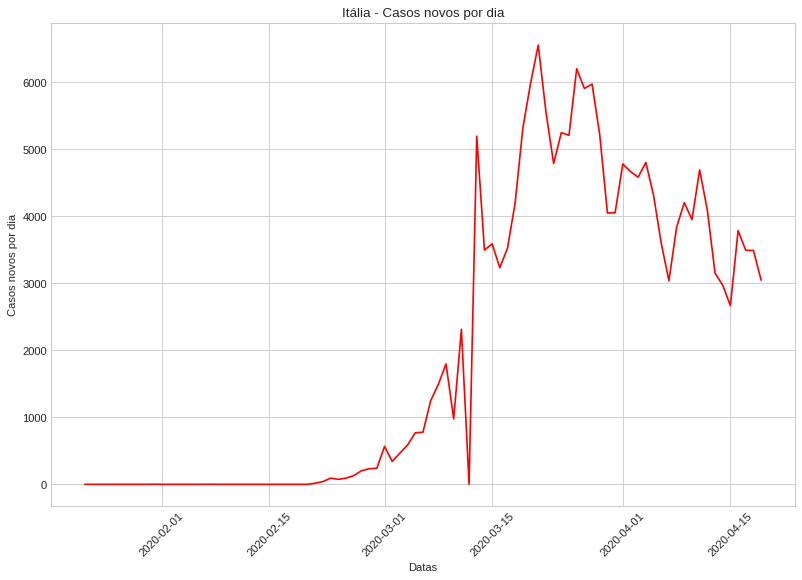

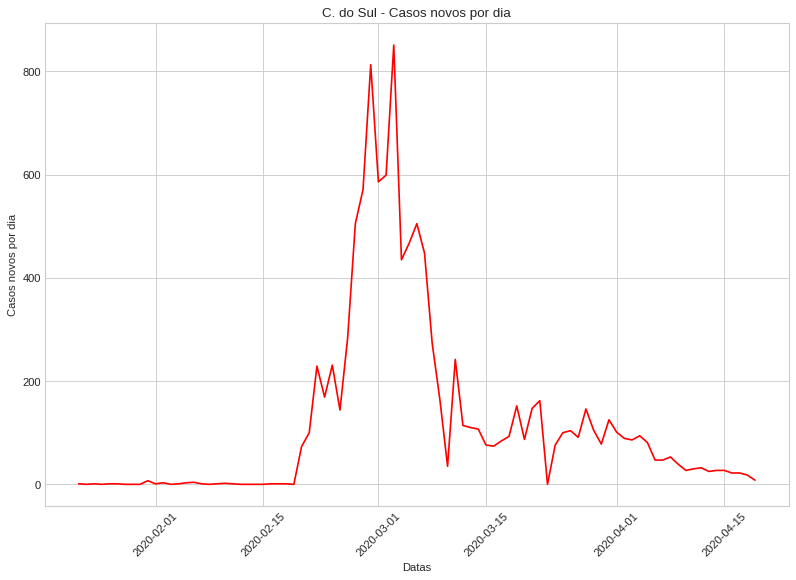

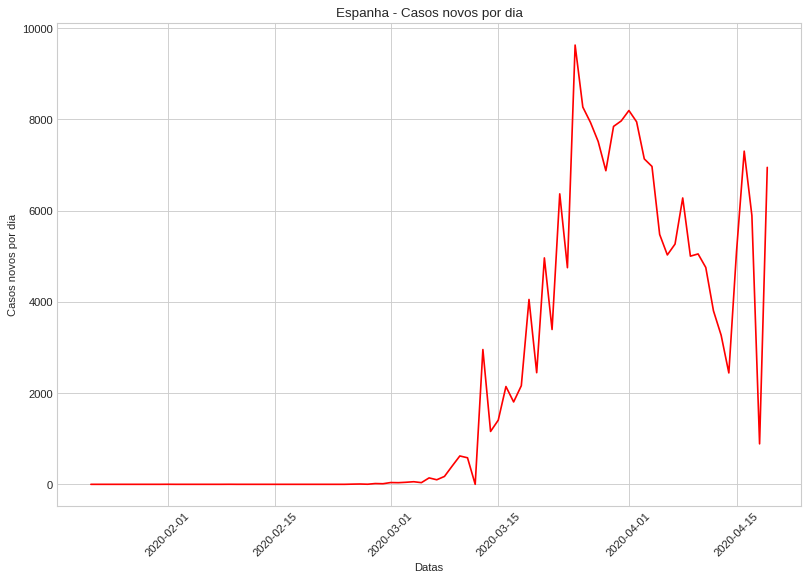

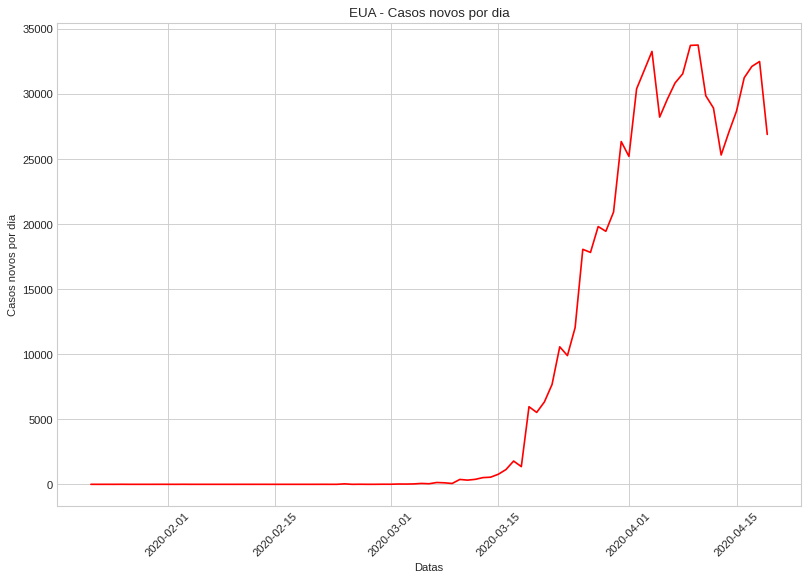

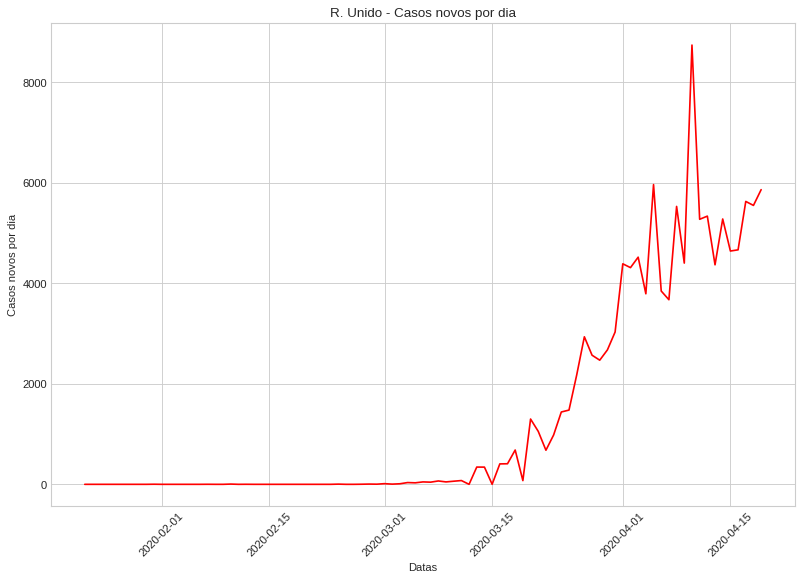

In [6]:
x = covid_novos_por_dia.index
for coluna in covid_novos_por_dia.columns:
  y = covid_novos_por_dia.loc[:, coluna]
  plt.figure(figsize=(12, 8), dpi=80)
  plt.style.use('seaborn-whitegrid')
  plt.xticks (rotation=45)
  plt.plot (x,y, color = 'red')
  plt.xlabel('Datas')
  plt.ylabel('Casos novos por dia')
  plt.title (coluna + ' - Casos novos por dia')
  plt.show()

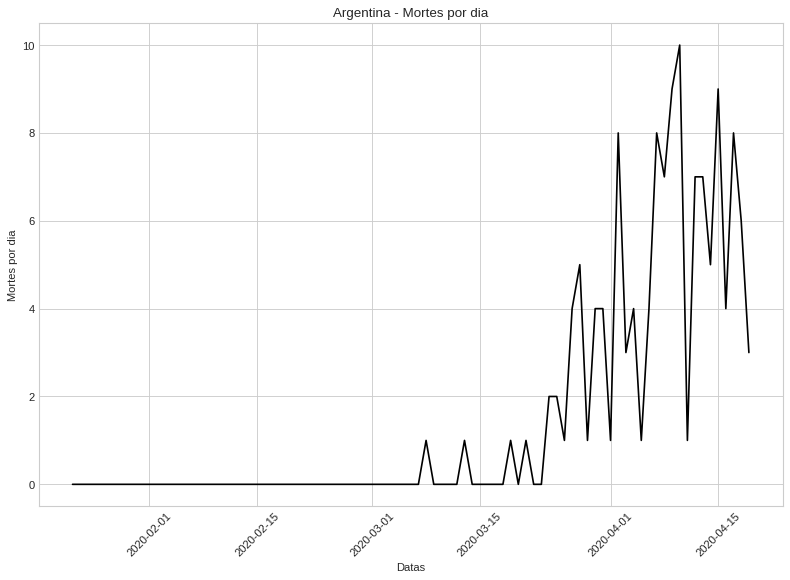

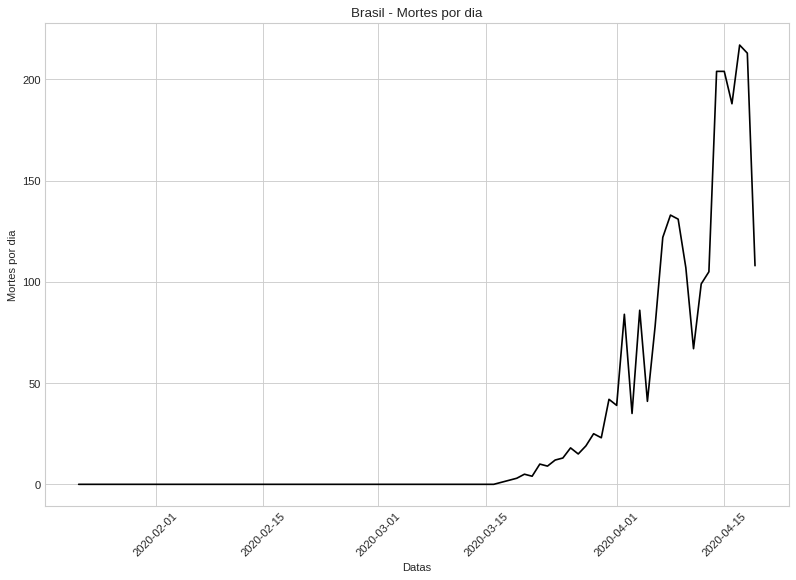

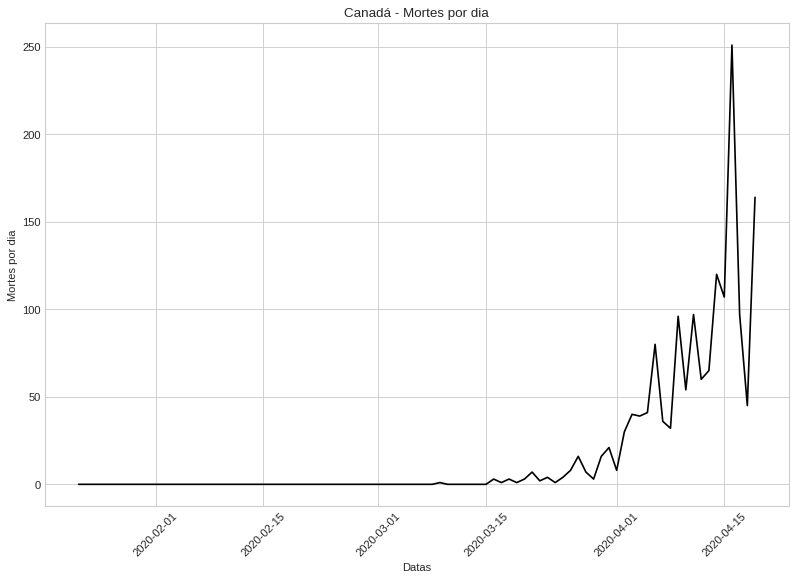

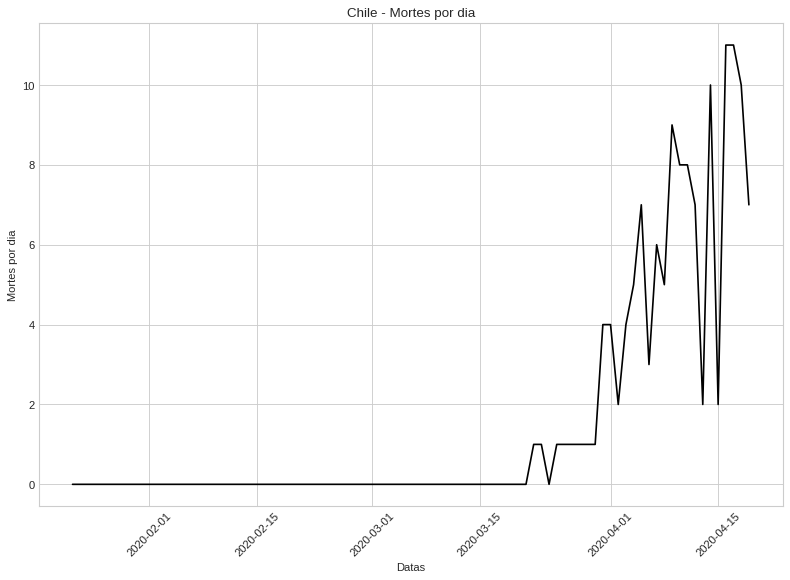

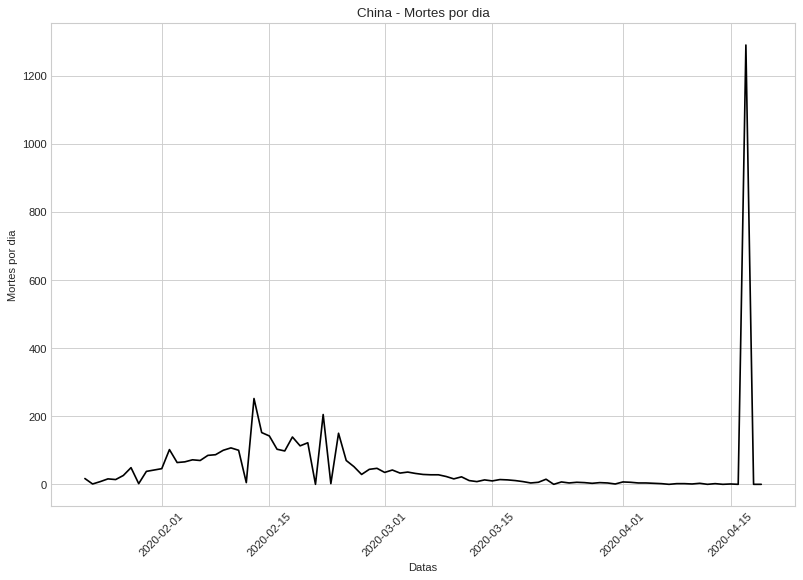

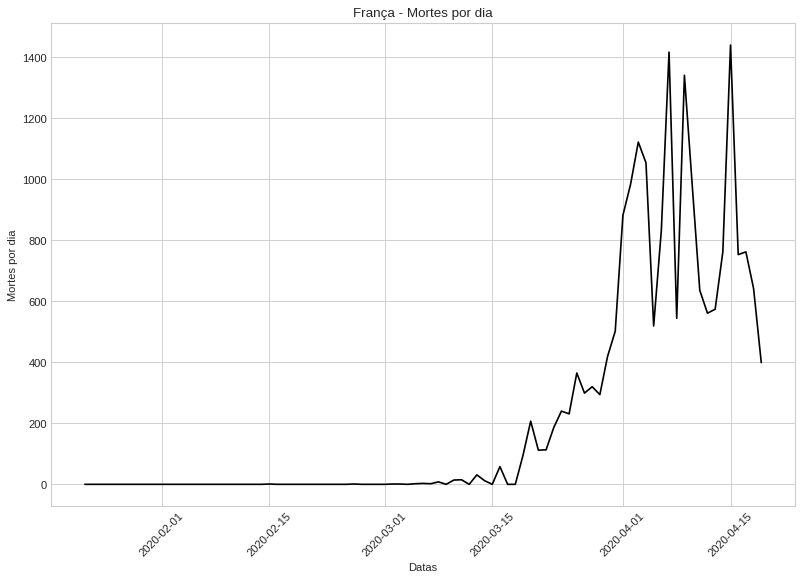

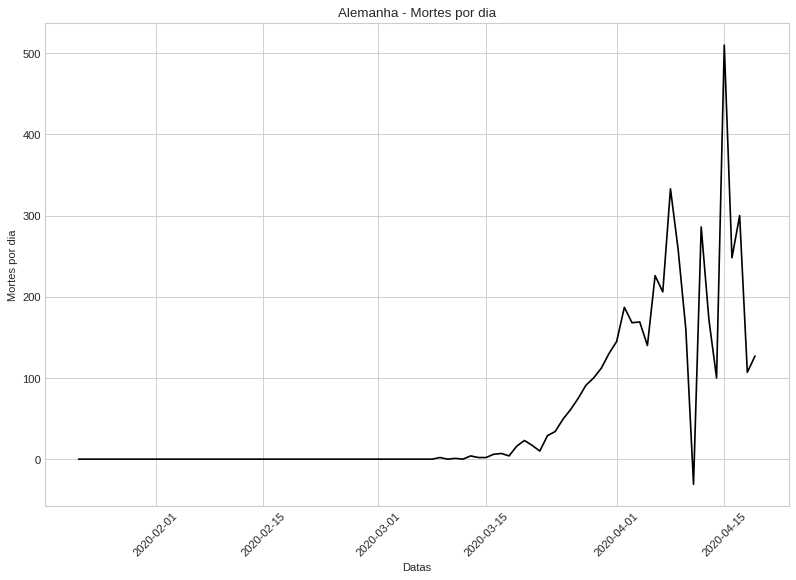

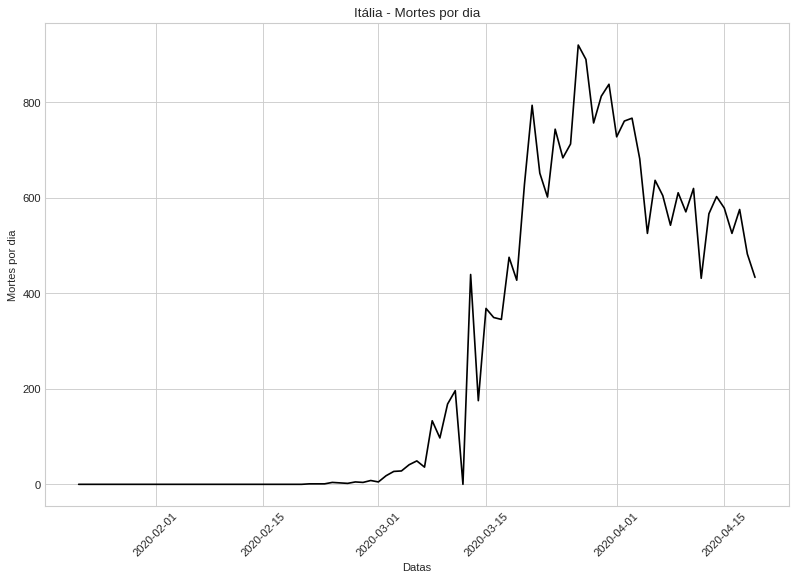

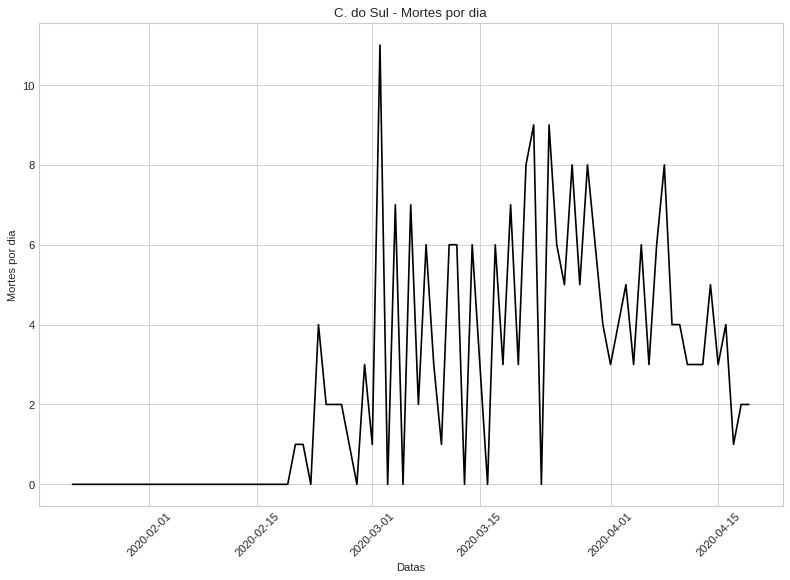

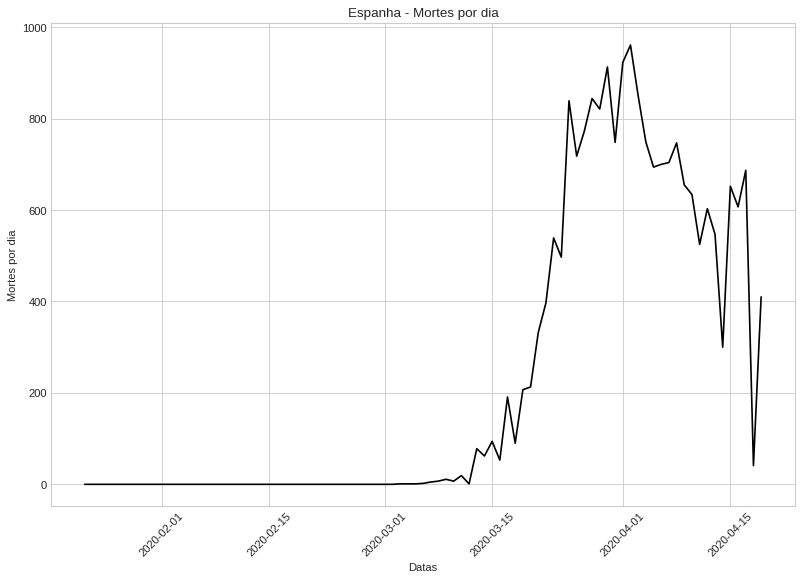

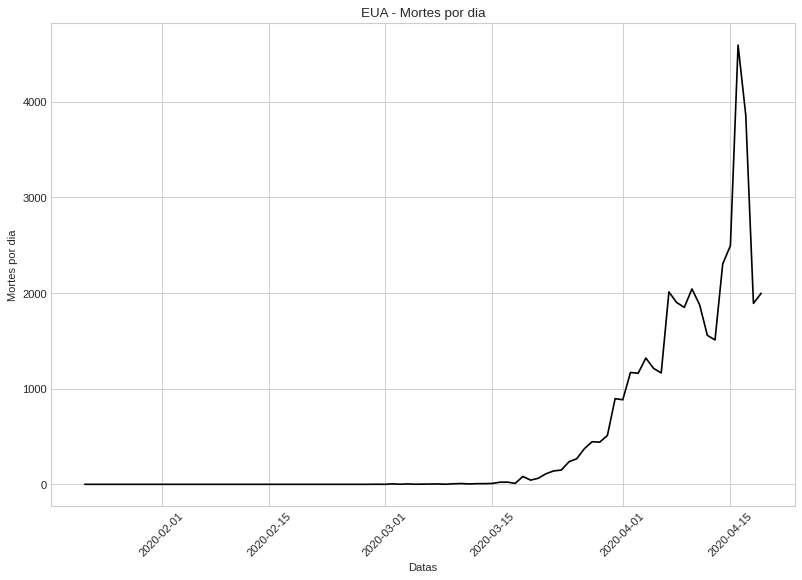

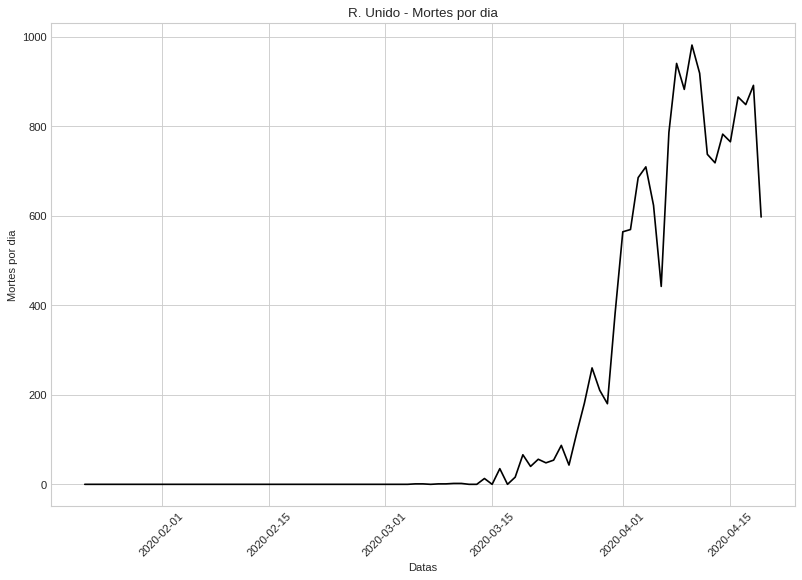

In [7]:
x = mortes_por_dia.index
for coluna in covid_novos_por_dia.columns:
  y = mortes_por_dia.loc[:, coluna]
  plt.figure(figsize=(12, 8), dpi=80)
  plt.style.use('seaborn-whitegrid')
  plt.xticks (rotation=45)
  plt.plot (x,y, color = 'black')
  plt.xlabel('Datas')
  plt.ylabel('Mortes por dia')
  plt.title (coluna + ' - Mortes por dia')
  plt.show()
